In [224]:
import pandas as pd
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
import fbprophet
from fbprophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
import wordcloud
from alphaVantageAPI.alphavantage import AlphaVantage 
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import pandas_profiling as pp
from pathlib import Path
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import itertools

In [167]:
# Read in data, convert date column to datetime format, set date column as index
data = Path("Data/2_deep_learning/combined_data_df.csv")
pd_csv = pd.read_csv('Data/2_deep_learning/combined_data_df.csv')
df = pd.DataFrame(pd_csv)
df['ds'] = pd.to_datetime(df['date'])
df['y'] = pd_csv['BTC']


In [168]:
df.set_index('date')

,DJIA,DIJA_open,DIJA_high,DIJA_Low,DIJA_vol,DIJA_pct_change,NASDAQ,NASDAQ_open,NASDAQ_high,NASDAQ_low,...,BTC_pct_change,GDP,CPI,IPI,UNEMP,NFP,IUC,FED,ds,y
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,17148.94,17405.48,17405.48,16957.63,1.480600e+08,-1.58,4903.09,4897.65,4903.09,4846.98,...,0.99,18382.82,237.80,102.88,4.90,143195.45,276142.86,4486600.57,2016-01-04,432.9
2016-01-05,17158.66,17147.50,17195.84,17038.61,1.057500e+08,0.06,4891.43,4917.84,4926.73,4872.74,...,-0.24,18383.82,237.79,102.86,4.90,143203.94,277714.29,4486603.29,2016-01-05,431.8
2016-01-06,16906.51,17154.83,17154.83,16817.62,1.202500e+08,-1.47,4835.77,4813.76,4866.04,4804.69,...,-0.89,18384.82,237.78,102.83,4.90,143212.42,279285.71,4486606.00,2016-01-06,428.0
2016-01-07,16514.10,16888.36,16888.36,16463.63,1.762400e+08,-2.32,4689.43,4736.40,4788.02,4688.17,...,7.26,18385.83,237.77,102.81,4.90,143220.90,280857.14,4488761.57,2016-01-07,459.0
2016-01-08,16346.45,16519.17,16651.89,16314.57,1.418500e+08,-1.02,4643.63,4722.02,4742.57,4637.85,...,-1.10,18386.83,237.76,102.79,4.90,143229.39,282428.57,4490917.14,2016-01-08,454.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,25015.55,25641.69,25641.69,24971.03,6.761800e+08,-2.84,9757.22,9995.12,10000.67,9749.07,...,-0.91,19503.37,258.47,99.68,10.35,139288.17,1418571.43,7061370.00,2020-06-26,9173.1
2020-06-27,25208.97,25478.61,25628.18,25012.74,5.791633e+08,-1.12,9796.20,9920.65,9959.56,9720.58,...,-1.72,19479.72,258.52,99.77,10.32,139346.93,1408000.00,7050904.00,2020-06-27,9015.3
2020-06-28,25402.38,25315.53,25614.66,25054.45,4.821467e+08,0.60,9835.17,9846.19,9918.45,9692.10,...,1.25,19456.07,258.57,99.87,10.29,139405.70,1394000.00,7040438.00,2020-06-28,9127.8


In [169]:
df['y'], lam = boxcox(df['BTC'])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


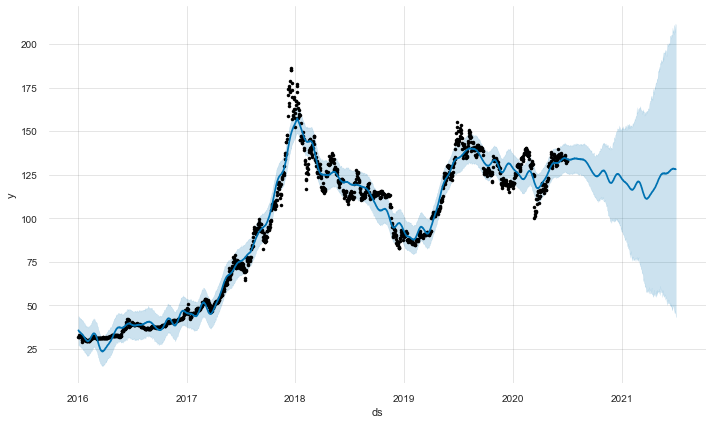

In [170]:
model = fbprophet.Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

plot = model.plot(fcst)

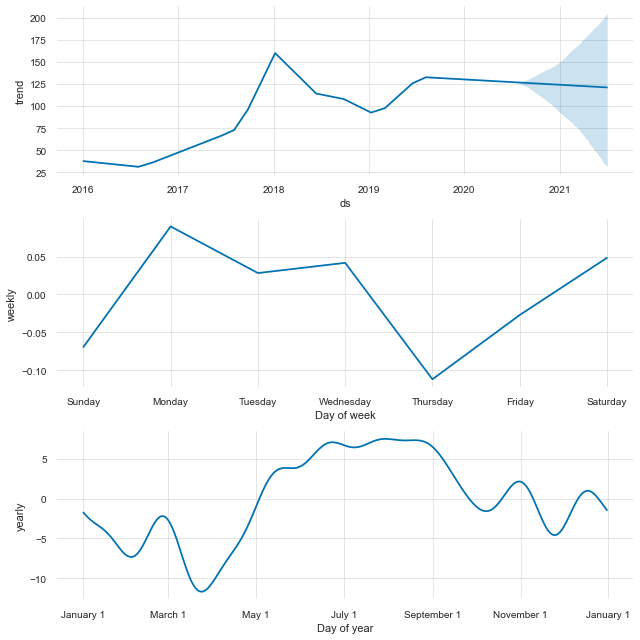

In [171]:
model.plot_components(forecast);

In [172]:
# Apply inverse Box-Cox transform to specific forecast columns
forecast[['yhat','yhat_upper','yhat_lower']] = forecast[['yhat','yhat_upper','yhat_lower']].apply(lambda x: inv_boxcox(x, lam))

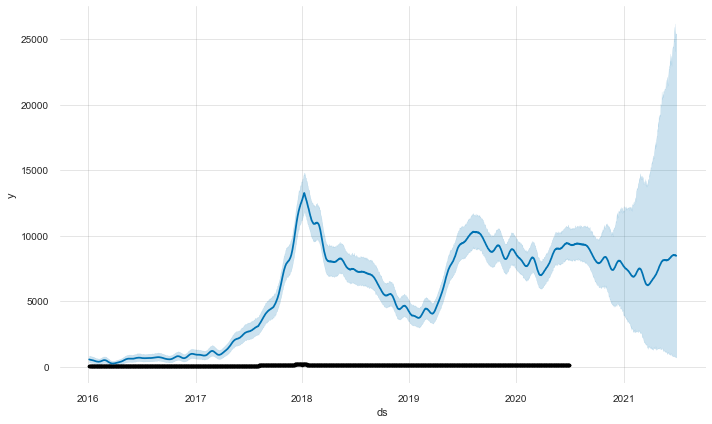

In [174]:
model.plot(forecast);

In [175]:
priors = [0.0015, 0.015]
prophets, labels = [], []
for prior in priors:
    prophet = fbprophet.Prophet(changepoint_prior_scale=prior)
    prophet.fit(df)
 
    prophets.append(prophet)
    labels.append(r"CP Prior = " + str(prior))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [146]:
forecast = []
for prophet in prophets:
    forecast = prophet.make_future_dataframe(periods=365 * 2,                                                    freq="D")
    forecast = prophet.predict(forecast)
 
    forecast = forecast.rename(columns={"ds" : str(priors[prophets.index(prophet)]) + "_ds"})
    forecast.append(forecast)

In [148]:
output = pd.merge(forecasts[0], forecasts[1], how = "inner", left_on = "0.0015_ds", right_on = "0.015_ds")
output = output.rename(columns={"0.0015_ds": "date"}).drop("0.015_ds", axis=1)

In [149]:
output = output.set_index('date')

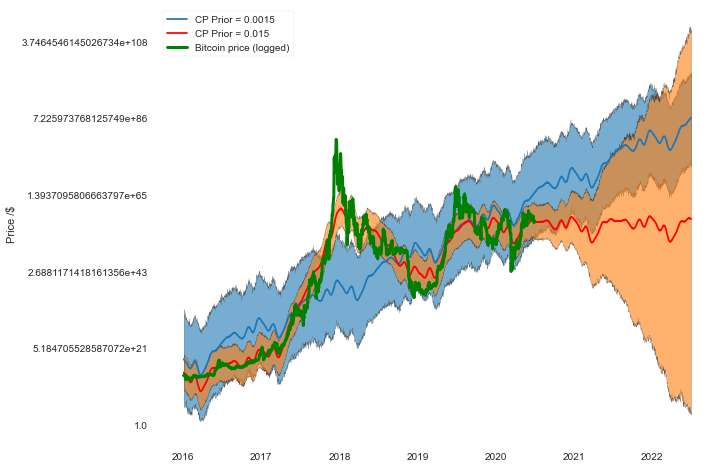

In [154]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(output.index, output["yhat_x"], label=labels[0])
ax.fill_between(output.index, output["yhat_upper_x"], output["yhat_lower_x"], alpha=0.6, edgecolor = "k")
ax.plot(output.index, output["yhat_y"], "r", label=labels[1]);
ax.fill_between(output.index, output["yhat_upper_y"], output["yhat_lower_y"], alpha=0.6, edgecolor = "k")
ax.plot(df.ds, df.y, color="green", linewidth=3, label=r"Bitcoin price (logged)")
a=ax.get_yticks().tolist()
ax.set_yticklabels(np.round(np.exp(a), 1))
plt.legend(loc="upper left")
plt.ylabel(r"Price /$")
plt.show()

In [229]:
df_cv = cross_validation(prophet, initial='700 days', period='365 days', horizon='365 days')
df_cv.head()

INFO:fbprophet:Making 2 forecasts with cutoffs between 2018-07-01 00:00:00 and 2019-07-01 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-07-02,114.478218,107.871201,121.585259,114.146069,2018-07-01
1,2018-07-03,114.184606,107.036921,120.983208,113.496578,2018-07-01
2,2018-07-04,113.911693,107.129916,120.701158,114.215310,2018-07-01
3,2018-07-05,113.826467,106.542384,120.903091,113.818283,2018-07-01
4,2018-07-06,113.601842,106.474217,120.126580,114.311527,2018-07-01


In [212]:
# Python
##cutoff = df_cv['cutoff'].unique()[0]
cutoff = df_cv['cutoff'].unique()[0]
df_cv = df_cv[df_cv['cutoff'].values == cutoff]

In [213]:
performance_metrics_results = performance_metrics(cross_validation_results)
print(performance_metrics_results)

     horizon          mse       rmse        mae      mape     mdape  coverage
0    36 days  1320.801330  36.342831  35.969125  0.251342  0.253642       0.0
1    37 days  1339.976098  36.605684  36.217534  0.252703  0.254399       0.0
2    38 days  1345.224178  36.677298  36.279382  0.253091  0.254399       0.0
3    39 days  1356.982492  36.837243  36.426870  0.253876  0.254399       0.0
4    40 days  1361.923074  36.904242  36.492213  0.254232  0.255397       0.0
..       ...          ...        ...        ...       ...       ...       ...
325 361 days   254.806118  15.962648  15.796589  0.117088  0.116953       1.0
326 362 days   252.919912  15.903456  15.733170  0.116632  0.112611       1.0
327 363 days   252.148319  15.879179  15.708353  0.116453  0.111385       1.0
328 364 days   254.634145  15.957260  15.793941  0.117028  0.115084       1.0
329 365 days   256.589292  16.018405  15.857466  0.117469  0.116953       1.0

[330 rows x 7 columns]


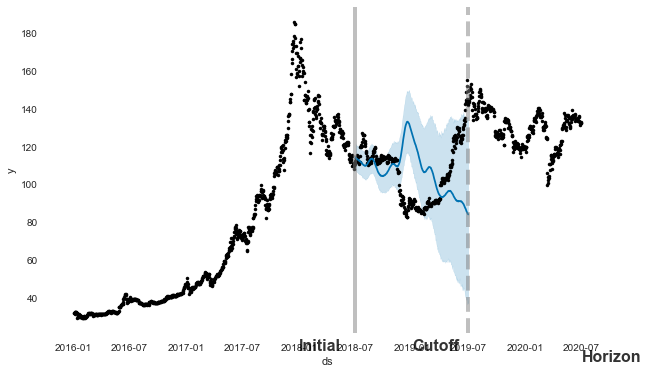

In [219]:
fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(model.history['ds'].values, model.history['y'], 'k.')
ax.plot(df_cv['ds'].values, df_cv['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv['ds'].values, df_cv['yhat_lower'],
                df_cv['yhat_upper'], color='#0072B2',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')
ax.text(x=pd.to_datetime('2018-01-01'),y=12, s='Initial', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)
ax.text(x=pd.to_datetime('2019-01-01'),y=12, s='Cutoff', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)
ax.axvline(x=pd.to_datetime(cutoff) + pd.Timedelta('365 days'), c='gray', lw=4,
           alpha=0.5, ls='--')
ax.text(x=pd.to_datetime('2020-07-01'),y=6, s='Horizon', color='black',
       fontsize=16, fontweight='bold', alpha=0.8);

In [220]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days,83.236044,9.123379,7.106383,0.058040,0.062842,0.444444
1,37 days,83.860000,9.157511,7.229131,0.059104,0.062842,0.444444
2,38 days,83.880391,9.158624,7.240543,0.059209,0.062842,0.444444
3,39 days,84.097288,9.170457,7.310186,0.059822,0.062842,0.444444
4,40 days,84.103417,9.170791,7.323008,0.059938,0.062842,0.444444


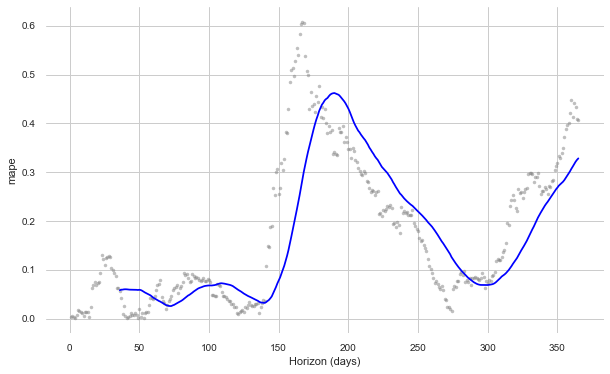

In [222]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')